<a href="https://colab.research.google.com/github/patchu-madathil/FastAI/blob/master/catsanddogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fast AI Lesson 1 


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import datasets
from fastai.vision import *
from fastai.metrics import error_rate

path = untar_data(URLs.PETS)

path.absolute()
path.ls()
annotation_path = path/'annotations'
image_path = path/'images'
fnames = get_image_files(image_path)
fnames[:5]
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'



In [0]:
data = ImageDataBunch.from_name_re(image_path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

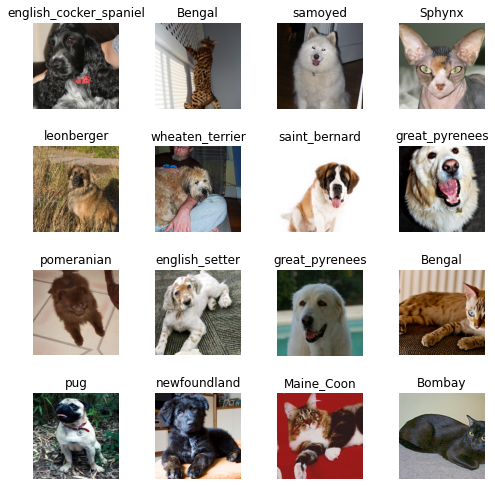

In [3]:
data.show_batch(rows=4, figsize=(7,7))

In [8]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.383975,0.289210,0.085927,01:46
1,0.614361,0.240965,0.078484,01:45
2,0.382036,0.214235,0.064276,01:52
3,0.284605,0.199742,0.064953,01:57


In [0]:
learn.save('stage-1')

In [15]:
help(ClassificationInterpretation)

Help on class ClassificationInterpretation in module fastai.train:

class ClassificationInterpretation(Interpretation)
 |  Interpretation methods for classification models.
 |  
 |  Method resolution order:
 |      ClassificationInterpretation
 |      Interpretation
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  GradCAM = _cl_int_gradcam(self, idx, ds_type:fastai.basic_data.DatasetType=<DatasetType.Valid: 2>, heatmap_thresh:int=16, image:bool=True)
 |  
 |  __init__(self, learn:fastai.basic_train.Learner, preds:torch.Tensor, y_true:torch.Tensor, losses:torch.Tensor, ds_type:fastai.basic_data.DatasetType=<DatasetType.Valid: 2>)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  confusion_matrix(self, slice_size:int=1)
 |      Confusion matrix as an `np.ndarray`.
 |  
 |  most_confused(self, min_val:int=1, slice_size:int=1) -> Collection[Tuple[str, str, int]]
 |      Sorted descending list of largest non-diagonal entries of confusion matrix, 

In [17]:
interpretor = ClassificationInterpretation.from_learner(learn)

In [0]:
losses, idx = interpretor.top_losses()

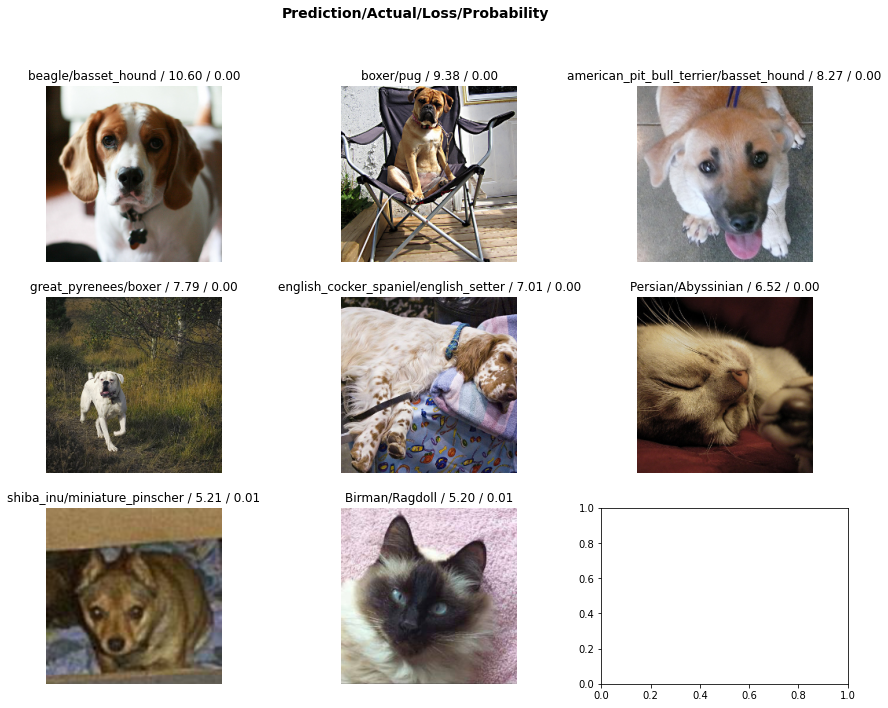

In [39]:
interpretor.plot_top_losses(8,figsize=(15,11))

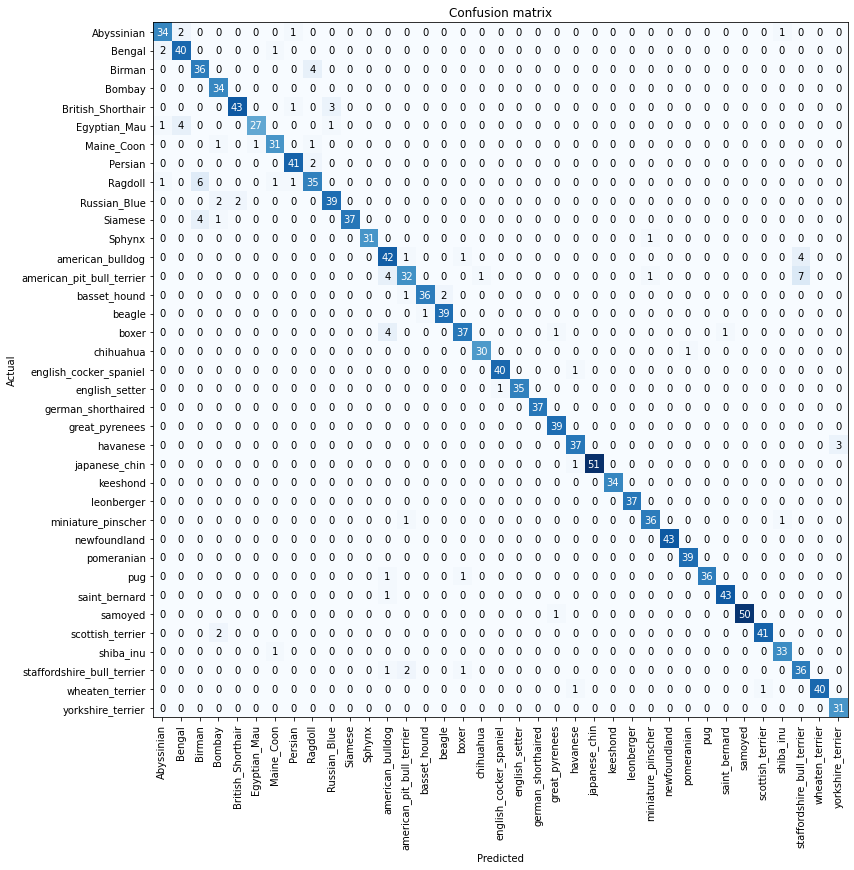

In [32]:
interpretor.plot_confusion_matrix(figsize=(12,12))

In [33]:
interpretor.most_confused(min_val=4)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Ragdoll', 'Birman', 6),
 ('Birman', 'Ragdoll', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Siamese', 'Birman', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('boxer', 'american_bulldog', 4)]

In [0]:
learn.unfreeze()

In [36]:
doc(interpretor.plot_top_losses)